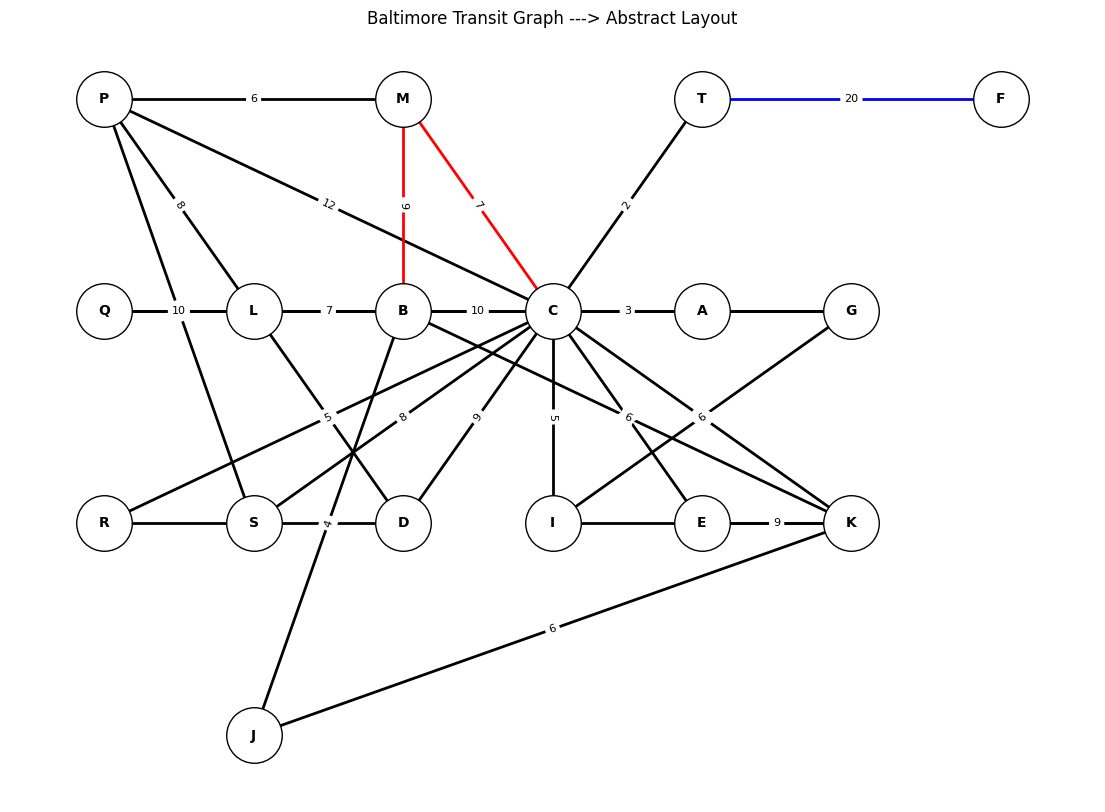

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

NODE_NAMES = {
    "P": "Penn Station (Transit Hub)",
    "A": "National Aquarium",
    "B": "M&T Bank Stadium",
    "C": "Convention Center (Light Rail Stop)",
    "D": "Fells Point",
    "E": "Federal Hill",
    "F": "Fort McHenry",
    "G": "Harbor East",
    "H": "Harbor Point",
    "I": "Inner Harbor (Harborplace)",
    "J": "Jonestown",
    "K": "Locust Point / Ferry Area",
    "L": "Little Italy",
    "M": "Mount Vernon",
    "O": "Oriole Park / Camden Yards (alt)",
    "Q": "Lexington Market / Downtown",
    "R": "Ridgely's Delight",
    "S": "Otterbein",
    "T": "Inner Harbor Water Taxi Dock"
}

DEFAULT_ADJ = {
    "P": [("M", 6, "walk"), ("L", 8, "walk"), ("C", 12, "walk"), ("S", 10, "walk")],
    "M": [("P", 6, "walk"), ("B", 9, "light_rail"), ("C", 7, "light_rail")],
    "L": [("P", 8, "walk"), ("Q", 10, "walk"), ("D", 6, "walk")],
    "Q": [("L", 10, "walk"), ("C", 7, "walk")],
    "C": [("A", 3, "walk"), ("T", 2, "walk"), ("B", 10, "walk"),
          ("D", 9, "walk"), ("E", 7, "walk"), ("G", 8, "walk"),
          ("I", 5, "walk"), ("R", 5, "walk"), ("S", 8, "walk"), ("P", 12, "walk")],
    "A": [("C", 3, "walk")],
    "T": [("C", 2, "walk"), ("F", 20, "water_taxi")],
    "F": [("T", 20, "water_taxi")],
    "B": [("M", 9, "light_rail"), ("C", 10, "walk"), ("J", 4, "walk"), ("K", 6, "walk")],
    "J": [("B", 4, "walk"), ("K", 6, "walk")],
    "K": [("B", 6, "walk"), ("J", 6, "walk"), ("I", 12, "walk"),
          ("E", 9, "walk"), ("C", 14, "walk")],
    "D": [("C", 9, "walk"), ("L", 6, "walk"), ("R", 6, "walk")],
    "G": [("L", 5, "walk"), ("I", 6, "walk"), ("C", 8, "walk")],
    "I": [("G", 6, "walk"), ("C", 5, "walk"), ("K", 12, "walk")],
    "E": [("C", 7, "walk"), ("K", 9, "walk")],
    "R": [("C", 5, "walk"), ("D", 6, "walk")],
    "S": [("P", 10, "walk"), ("C", 8, "walk")]
}

G = nx.Graph()

for u, nbrs in DEFAULT_ADJ.items():
    for v, w, mode in nbrs:
        G.add_edge(u, v, weight=w, mode=mode)


pos = {
    "P": (0, 4),
    "M": (2, 4),
    "T": (4, 4),
    "F": (6, 4),

    "A": (4, 3),
    "G": (5, 3),
    "I": (3, 2),
    "S": (1, 2),
    "R": (0, 2),

    "C": (3, 3),
    "L": (1, 3),
    "Q": (0, 3),
    "D": (2, 2),
    "E": (4, 2),
    "K": (5, 2),
    "B": (2, 3),
    "J": (1, 1)
}


mode_colors = {
    "walk": "black",
    "light_rail": "red",
    "water_taxi": "blue"
}

edge_colors = [mode_colors[G[u][v]['mode']] for u, v in G.edges()]
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}


plt.figure(figsize=(14, 10))

nx.draw_networkx_nodes(G, pos, node_color="white", edgecolors="black", node_size=1600)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Baltimore Transit Graph ---> Abstract Layout")
plt.axis("off")
plt.show()
